In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is 
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [3]:
X = np.load('smiley_X.npy')

In [17]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
y = np.load('smiley_y.npy')

In [18]:
y

array([0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1.])

In [19]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)

In [20]:
X = X.reshape(144,81)

In [21]:
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

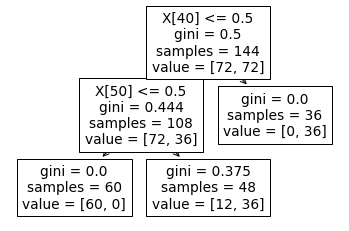

In [22]:
plot_tree(tree_clf);

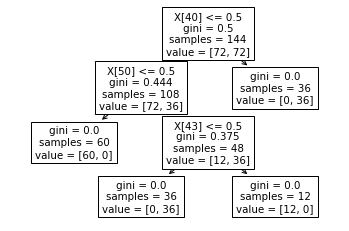

In [23]:
tree_clfd3 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clfd3.fit(X, y)
plot_tree(tree_clfd3);

In [24]:
XX3 = X[:, [8,20,24,37,39,40,41,43,47,51,57,58,59]]

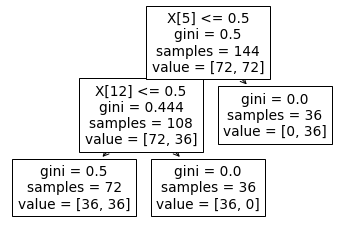

In [25]:
tree_clf4 = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf4.fit(XX3, y)
plot_tree(tree_clf4);

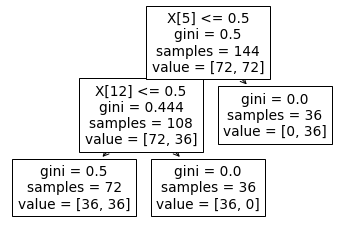

In [26]:
tree_clf5 = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf5.fit(XX3, y)
plot_tree(tree_clf5);

In [27]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [16]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

ValueError: X has 2 features, but DecisionTreeClassifier is expecting 81 features as input.

<Figure size 576x288 with 0 Axes>

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state=2021)

In [29]:
X_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
print(np.shape(X_train))
print(np.shape(Y_train))
print(np.shape(X_test))
print(np.shape(Y_test))

(115, 81)
(115,)
(29, 81)
(29,)


In [31]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state=2021)

In [32]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [33]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state=2021)

In [34]:
search_space = {
    "n_estimators": [100,200],
    "max_depth": [2,3],
    "gamma": [0.01,0.1],
    "learning_rate": [0.001, 0.01, 0.1, 1]
}

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
GS = GridSearchCV(estimator = xgb_model,
                 param_grid = search_space,
                 scoring = ["r2", "neg_root_mean_squared_error"],
                 refit = "r2",
                 cv=5,
                 verbose=4)

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state=2021)

In [38]:
GS.fit(X_train, Y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=2, n_estimators=100; neg_root_mean_squared_error: (test=-0.469) r2: (test=0.106) total time=   0.1s
[CV 2/5] END gamma=0.01, learning_rate=0.001, max_depth=2, n_estimators=100; neg_root_mean_squared_error: (test=-0.465) r2: (test=0.092) total time=   0.0s
[CV 3/5] END gamma=0.01, learning_rate=0.001, max_depth=2, n_estimators=100; neg_root_mean_squared_error: (test=-0.462) r2: (test=0.130) total time=   0.0s
[CV 4/5] END gamma=0.01, learning_rate=0.001, max_depth=2, n_estimators=100; neg_root_mean_squared_error: (test=-0.473) r2: (test=0.014) total time=   0.0s
[CV 5/5] END gamma=0.01, learning_rate=0.001, max_depth=2, n_estimators=100; neg_root_mean_squared_error: (test=-0.472) r2: (test=0.093) total time=   0.1s
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=2, n_estimators=200; neg_root_mean_squared_error: (test=-0.441) r2: (test=0.208) total time=   0.1s
[C

[CV 1/5] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.018) r2: (test=0.999) total time=   0.1s
[CV 2/5] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.018) r2: (test=0.999) total time=   0.1s
[CV 3/5] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.016) r2: (test=0.999) total time=   0.1s
[CV 4/5] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.018) r2: (test=0.999) total time=   0.1s
[CV 5/5] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.018) r2: (test=0.999) total time=   0.1s
[CV 1/5] END gamma=0.01, learning_rate=1, max_depth=2, n_estimators=100; neg_root_mean_squared_error: (test=-0.013) r2: (test=0.999) total time=   0.0s
[CV 2/5] END gamma=0.01, learning_rate=1, max_depth=2, n_estimators=100; neg_r

[CV 3/5] END gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-0.189) r2: (test=0.854) total time=   0.1s
[CV 4/5] END gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-0.194) r2: (test=0.834) total time=   0.1s
[CV 5/5] END gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-0.192) r2: (test=0.850) total time=   0.1s
[CV 1/5] END gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.073) r2: (test=0.978) total time=   0.1s
[CV 2/5] END gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.073) r2: (test=0.978) total time=   0.1s
[CV 3/5] END gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.072) r2: (test=0.979) total time=   0.1s
[CV 4/5] END gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=200; n

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=Non

In [39]:
print(GS.best_estimator_)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.01, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=2021, ...)


In [40]:
GS.best_params_

{'gamma': 0.01, 'learning_rate': 1, 'max_depth': 3, 'n_estimators': 100}

In [41]:
GS.best_score_

0.9996677310669713

In [42]:
import pandas as pd
import numpy as np
df = pd.DataFrame(GS.cv_results_)
df = df.sort_values("rank_test_r2")
df.to_csv("cv_results.csv")

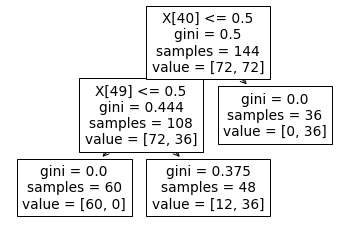

In [43]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=0)
tree_clf.fit(X, y)
plot_tree(tree_clf);

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
print(scores)

[1. 1. 1. 1. 1.]


In [45]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=10)
print(scores)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [46]:
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X,y, test_size=0.3, random_state=2021)
X6_train, X6_test, Y6_train, Y6_test = train_test_split(X,y, test_size=0.6, random_state=2021)

In [47]:
print(np.shape(X3_train))
print(np.shape(Y3_train))
print(np.shape(X3_test))
print(np.shape(Y3_test))

(100, 81)
(100,)
(44, 81)
(44,)


In [48]:
print(np.shape(X6_train))
print(np.shape(Y6_train))
print(np.shape(X6_test))
print(np.shape(Y6_test))

(57, 81)
(57,)
(87, 81)
(87,)


In [49]:
GS30 = GridSearchCV(estimator = xgb_model,
                 param_grid = search_space,
                 scoring = ["r2", "neg_root_mean_squared_error"],
                 refit = "r2",
                 cv=5,
                 verbose=4)

In [50]:
GS60 = GridSearchCV(estimator = xgb_model,
                 param_grid = search_space,
                 scoring = ["r2", "neg_root_mean_squared_error"],
                 refit = "r2",
                 cv=5,
                 verbose=4)

In [51]:
GS30.fit(X3_train, Y3_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=2, n_estimators=100; neg_root_mean_squared_error: (test=-0.466) r2: (test=0.131) total time=   0.1s
[CV 2/5] END gamma=0.01, learning_rate=0.001, max_depth=2, n_estimators=100; neg_root_mean_squared_error: (test=-0.466) r2: (test=0.122) total time=   0.1s
[CV 3/5] END gamma=0.01, learning_rate=0.001, max_depth=2, n_estimators=100; neg_root_mean_squared_error: (test=-0.463) r2: (test=0.141) total time=   0.0s
[CV 4/5] END gamma=0.01, learning_rate=0.001, max_depth=2, n_estimators=100; neg_root_mean_squared_error: (test=-0.479) r2: (test=-0.093) total time=   0.1s
[CV 5/5] END gamma=0.01, learning_rate=0.001, max_depth=2, n_estimators=100; neg_root_mean_squared_error: (test=-0.471) r2: (test=0.075) total time=   0.1s
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=2, n_estimators=200; neg_root_mean_squared_error: (test=-0.436) r2: (test=0.240) total time=   0.1s
[

[CV 1/5] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.018) r2: (test=0.999) total time=   0.1s
[CV 2/5] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.018) r2: (test=0.999) total time=   0.1s
[CV 3/5] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.018) r2: (test=0.999) total time=   0.1s
[CV 4/5] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.023) r2: (test=0.997) total time=   0.1s
[CV 5/5] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.020) r2: (test=0.998) total time=   0.1s
[CV 1/5] END gamma=0.01, learning_rate=1, max_depth=2, n_estimators=100; neg_root_mean_squared_error: (test=-0.017) r2: (test=0.999) total time=   0.0s
[CV 2/5] END gamma=0.01, learning_rate=1, max_depth=2, n_estimators=100; neg_r

[CV 5/5] END gamma=0.1, learning_rate=0.01, max_depth=2, n_estimators=200; neg_root_mean_squared_error: (test=-0.189) r2: (test=0.851) total time=   0.1s
[CV 1/5] END gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-0.191) r2: (test=0.854) total time=   0.0s
[CV 2/5] END gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-0.192) r2: (test=0.852) total time=   0.1s
[CV 3/5] END gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-0.191) r2: (test=0.855) total time=   0.1s
[CV 4/5] END gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-0.200) r2: (test=0.810) total time=   0.1s
[CV 5/5] END gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-0.193) r2: (test=0.845) total time=   0.1s
[CV 1/5] END gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=200; n

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=Non

In [52]:
GS.best_params_

{'gamma': 0.01, 'learning_rate': 1, 'max_depth': 3, 'n_estimators': 100}

In [53]:
GS.best_score_

0.9996677310669713

In [55]:
GS60.fit(X6_train, Y6_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=2, n_estimators=100; neg_root_mean_squared_error: (test=-0.474) r2: (test=0.099) total time=   0.1s
[CV 2/5] END gamma=0.01, learning_rate=0.001, max_depth=2, n_estimators=100; neg_root_mean_squared_error: (test=-0.475) r2: (test=0.072) total time=   0.0s
[CV 3/5] END gamma=0.01, learning_rate=0.001, max_depth=2, n_estimators=100; neg_root_mean_squared_error: (test=-0.466) r2: (test=-0.463) total time=   0.0s
[CV 4/5] END gamma=0.01, learning_rate=0.001, max_depth=2, n_estimators=100; neg_root_mean_squared_error: (test=-0.472) r2: (test=0.102) total time=   0.0s
[CV 5/5] END gamma=0.01, learning_rate=0.001, max_depth=2, n_estimators=100; neg_root_mean_squared_error: (test=-0.472) r2: (test=-0.121) total time=   0.0s
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=2, n_estimators=200; neg_root_mean_squared_error: (test=-0.453) r2: (test=0.180) total time=   0.1s


[CV 5/5] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-0.026) r2: (test=0.997) total time=   0.1s
[CV 1/5] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.160) r2: (test=0.897) total time=   0.1s
[CV 2/5] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.059) r2: (test=0.986) total time=   0.1s
[CV 3/5] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.024) r2: (test=0.996) total time=   0.1s
[CV 4/5] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.022) r2: (test=0.998) total time=   0.1s
[CV 5/5] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.026) r2: (test=0.997) total time=   0.1s
[CV 1/5] END gamma=0.01, learning_rate=1, max_depth=2, n_estimators=100; neg

[CV 1/5] END gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-0.322) r2: (test=0.587) total time=   0.1s
[CV 2/5] END gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-0.238) r2: (test=0.766) total time=   0.1s
[CV 3/5] END gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-0.198) r2: (test=0.736) total time=   0.1s
[CV 4/5] END gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-0.200) r2: (test=0.838) total time=   0.0s
[CV 5/5] END gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-0.201) r2: (test=0.796) total time=   0.1s
[CV 1/5] END gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.210) r2: (test=0.824) total time=   0.1s
[CV 2/5] END gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=200; n

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=Non

In [56]:
GS60.best_params_

{'gamma': 0.01, 'learning_rate': 1, 'max_depth': 3, 'n_estimators': 100}

In [57]:
GS60.best_score_

0.9768466552100248

In [58]:
GS2010 = GridSearchCV(estimator = xgb_model,
                 param_grid = search_space,
                 scoring = ["r2", "neg_root_mean_squared_error"],
                 refit = "r2",
                 cv=10,
                 verbose=4)

In [59]:
GS2010.fit(X_train, Y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV 1/10] END gamma=0.01, learning_rate=0.001, max_depth=2, n_estimators=100; neg_root_mean_squared_error: (test=-0.467) r2: (test=0.128) total time=   0.1s
[CV 2/10] END gamma=0.01, learning_rate=0.001, max_depth=2, n_estimators=100; neg_root_mean_squared_error: (test=-0.470) r2: (test=0.006) total time=   0.1s
[CV 3/10] END gamma=0.01, learning_rate=0.001, max_depth=2, n_estimators=100; neg_root_mean_squared_error: (test=-0.465) r2: (test=0.136) total time=   0.1s
[CV 4/10] END gamma=0.01, learning_rate=0.001, max_depth=2, n_estimators=100; neg_root_mean_squared_error: (test=-0.465) r2: (test=0.109) total time=   0.1s
[CV 5/10] END gamma=0.01, learning_rate=0.001, max_depth=2, n_estimators=100; neg_root_mean_squared_error: (test=-0.465) r2: (test=0.136) total time=   0.1s
[CV 6/10] END gamma=0.01, learning_rate=0.001, max_depth=2, n_estimators=100; neg_root_mean_squared_error: (test=-0.463) r2: (test=0.135) total time=   

[CV 3/10] END gamma=0.01, learning_rate=0.01, max_depth=2, n_estimators=200; neg_root_mean_squared_error: (test=-0.161) r2: (test=0.896) total time=   0.1s
[CV 4/10] END gamma=0.01, learning_rate=0.01, max_depth=2, n_estimators=200; neg_root_mean_squared_error: (test=-0.168) r2: (test=0.884) total time=   0.1s
[CV 5/10] END gamma=0.01, learning_rate=0.01, max_depth=2, n_estimators=200; neg_root_mean_squared_error: (test=-0.161) r2: (test=0.896) total time=   0.1s
[CV 6/10] END gamma=0.01, learning_rate=0.01, max_depth=2, n_estimators=200; neg_root_mean_squared_error: (test=-0.158) r2: (test=0.900) total time=   0.1s
[CV 7/10] END gamma=0.01, learning_rate=0.01, max_depth=2, n_estimators=200; neg_root_mean_squared_error: (test=-0.180) r2: (test=0.859) total time=   0.1s
[CV 8/10] END gamma=0.01, learning_rate=0.01, max_depth=2, n_estimators=200; neg_root_mean_squared_error: (test=-0.185) r2: (test=0.771) total time=   0.1s
[CV 9/10] END gamma=0.01, learning_rate=0.01, max_depth=2, n_est

[CV 8/10] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-0.017) r2: (test=0.998) total time=   0.1s
[CV 9/10] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-0.017) r2: (test=0.999) total time=   0.1s
[CV 10/10] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-0.017) r2: (test=0.998) total time=   0.1s
[CV 1/10] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.017) r2: (test=0.999) total time=   0.1s
[CV 2/10] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.017) r2: (test=0.999) total time=   0.1s
[CV 3/10] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.016) r2: (test=0.999) total time=   0.1s
[CV 4/10] END gamma=0.01, learning_rate=0.1, max_depth=3, n_estimator

[CV 2/10] END gamma=0.1, learning_rate=0.001, max_depth=2, n_estimators=100; neg_root_mean_squared_error: (test=-0.470) r2: (test=0.006) total time=   0.1s
[CV 3/10] END gamma=0.1, learning_rate=0.001, max_depth=2, n_estimators=100; neg_root_mean_squared_error: (test=-0.465) r2: (test=0.136) total time=   0.0s
[CV 4/10] END gamma=0.1, learning_rate=0.001, max_depth=2, n_estimators=100; neg_root_mean_squared_error: (test=-0.465) r2: (test=0.109) total time=   0.0s
[CV 5/10] END gamma=0.1, learning_rate=0.001, max_depth=2, n_estimators=100; neg_root_mean_squared_error: (test=-0.465) r2: (test=0.136) total time=   0.0s
[CV 6/10] END gamma=0.1, learning_rate=0.001, max_depth=2, n_estimators=100; neg_root_mean_squared_error: (test=-0.463) r2: (test=0.135) total time=   0.0s
[CV 7/10] END gamma=0.1, learning_rate=0.001, max_depth=2, n_estimators=100; neg_root_mean_squared_error: (test=-0.474) r2: (test=0.030) total time=   0.0s
[CV 8/10] END gamma=0.1, learning_rate=0.001, max_depth=2, n_est

[CV 5/10] END gamma=0.1, learning_rate=0.01, max_depth=2, n_estimators=200; neg_root_mean_squared_error: (test=-0.162) r2: (test=0.895) total time=   0.1s
[CV 6/10] END gamma=0.1, learning_rate=0.01, max_depth=2, n_estimators=200; neg_root_mean_squared_error: (test=-0.158) r2: (test=0.900) total time=   0.1s
[CV 7/10] END gamma=0.1, learning_rate=0.01, max_depth=2, n_estimators=200; neg_root_mean_squared_error: (test=-0.181) r2: (test=0.858) total time=   0.1s
[CV 8/10] END gamma=0.1, learning_rate=0.01, max_depth=2, n_estimators=200; neg_root_mean_squared_error: (test=-0.188) r2: (test=0.763) total time=   0.1s
[CV 9/10] END gamma=0.1, learning_rate=0.01, max_depth=2, n_estimators=200; neg_root_mean_squared_error: (test=-0.195) r2: (test=0.847) total time=   0.1s
[CV 10/10] END gamma=0.1, learning_rate=0.01, max_depth=2, n_estimators=200; neg_root_mean_squared_error: (test=-0.179) r2: (test=0.838) total time=   0.1s
[CV 1/10] END gamma=0.1, learning_rate=0.01, max_depth=3, n_estimator

[CV 8/10] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-0.051) r2: (test=0.982) total time=   0.1s
[CV 9/10] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-0.053) r2: (test=0.989) total time=   0.1s
[CV 10/10] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-0.052) r2: (test=0.986) total time=   0.1s
[CV 1/10] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.051) r2: (test=0.990) total time=   0.2s
[CV 2/10] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.052) r2: (test=0.988) total time=   0.1s
[CV 3/10] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.053) r2: (test=0.989) total time=   0.2s
[CV 4/10] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=200; 

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None

In [60]:
GS2010.best_params_

{'gamma': 0.01, 'learning_rate': 1, 'max_depth': 3, 'n_estimators': 100}

In [61]:
GS.best_score_

0.9996677310669713

[Text(0.6, 0.8333333333333334, 'X[40] <= 0.5\ngini = 0.5\nsamples = 144\nvalue = [72, 72]'),
 Text(0.4, 0.5, 'X[49] <= 0.5\ngini = 0.444\nsamples = 108\nvalue = [72, 36]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 60\nvalue = [60, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.375\nsamples = 48\nvalue = [12, 36]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36]')]

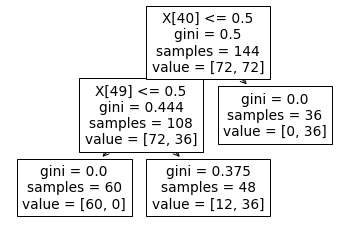

In [62]:
#pred = tree.predict(X_test)
plot_tree(tree_clf)

In [63]:
tree_predit = tree_clf.predict(X_test)

In [64]:
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection  import train_test_split, KFold, StratifiedKFold, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, precision_recall_curve, roc_curve, roc_auc_score, RocCurveDisplay, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

In [65]:
tree_accuracy = accuracy_score(Y_test, tree_predit)
tree_f1 = f1_score(Y_test, tree_predit)
tree_precision = precision_score(Y_test, tree_predit)
tree_recall = recall_score(Y_test, tree_predit)
tree_cm = confusion_matrix(Y_test, tree_predit)

print("Accuracy:", tree_accuracy)
print("F1 Score: ", tree_f1)
print("Precision Score: ", tree_precision)
print("Recall Score: ", tree_recall)

Accuracy: 0.9310344827586207
F1 Score:  0.9333333333333333
Precision Score:  0.875
Recall Score:  1.0


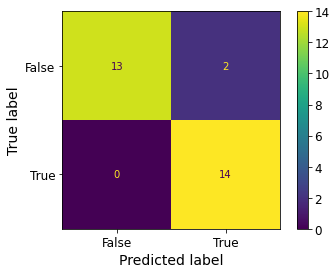

In [66]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = tree_cm, display_labels = [False, True])
cm_display.plot()
plt.show()

In [67]:
parameters = {
    'criterion':["gini","entropy"],  # Can also include "log_loss"
    'max_depth':[1,2,3,4,5],
    'min_samples_split':[2,3,4,5],
    'min_samples_leaf':[1,2,3,4,5],
    'min_weight_fraction_leaf':[0.0,0.1,0.2,0.3,0.4],
    'max_features':[1,2,3,4,5]
}

dtc = DecisionTreeClassifier()
search = GridSearchCV(estimator = dtc, 
                      param_grid = parameters,
                      scoring = ["accuracy", "f1", "precision", "recall", "roc_auc"],
                      refit = "accuracy",
                      cv = 10,
                      # verbose = 4
                     )

search.fit(X_train, Y_train);
print("done")

done


In [68]:
print(search.best_estimator_)

DecisionTreeClassifier(max_depth=5, max_features=5, min_samples_leaf=4,
                       min_samples_split=3)


In [69]:
print(search.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 4, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0}


In [70]:
parameters1 = {
    'criterion':["gini"],  # Can also include "log_loss"
    'max_depth':[5],
    'min_samples_split':[2],
    'min_samples_leaf':[2],
    'min_weight_fraction_leaf':[0.0],
    'max_features':[5]
}

dtc = DecisionTreeClassifier()
search1 = GridSearchCV(estimator = dtc, 
                      param_grid = parameters1,
                      scoring = ["accuracy", "f1", "precision", "recall", "roc_auc"],
                      refit = "accuracy",
                      cv = 10,
                      # verbose = 4
                     )

search.fit(X_train, Y_train);
print("done")

done


In [71]:
search1.fit(X_train, Y_train);
print("done")

done


In [72]:
print(search1.best_estimator_)

DecisionTreeClassifier(max_depth=5, max_features=5, min_samples_leaf=2)


In [73]:
print(search.best_score_)

0.965909090909091


In [74]:
print(search1.best_score_)

0.9659090909090908


In [75]:
# TP-[0,0] FN-[0,1] 
# FP-[1,0] TN-[1,1]
#Sensitivity = TP/(TP+FN)
#Specificity = TN/(TN+FP)
#Precision precision=TP/(TP+FP)
#Recall recall =TP/(TP+FN)
#F-measure =( 2 × recall × precision) / (recall+precision)

In [76]:
GS30.best_score_

0.9992352704283063

In [77]:
search30 = GridSearchCV(estimator = dtc, 
                      param_grid = parameters1,
                      scoring = ["accuracy", "f1", "precision", "recall", "roc_auc"],
                      refit = "accuracy",
                      cv = 10,
                      # verbose = 4
                     )

search30.fit(X3_train, Y3_train);
print("done")

done


In [78]:
print(search30.best_score_)

0.9100000000000001


In [79]:
search60 = GridSearchCV(estimator = dtc, 
                      param_grid = parameters1,
                      scoring = ["accuracy", "f1", "precision", "recall", "roc_auc"],
                      refit = "accuracy",
                      cv = 10,
                      # verbose = 4
                     )

search60.fit(X6_train, Y6_train);
print("done")

done


In [80]:
print(search60.best_score_)

0.8666666666666668


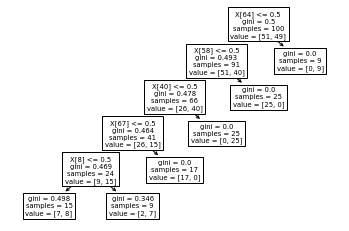

In [81]:
#tree_clf30 = DecisionTreeClassifier(max_depth=2, random_state=0)
tree_clf30 = DecisionTreeClassifier(max_depth=5, max_features=5, min_samples_leaf=2)
tree_clf30.fit(X3_train, Y3_train)
plot_tree(tree_clf30);

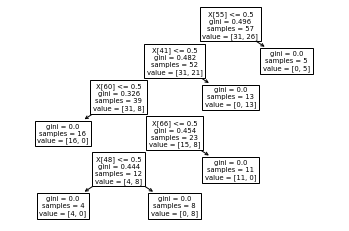

In [82]:
#tree_clf60 = DecisionTreeClassifier(max_depth=2, random_state=0)
tree_clf60 = DecisionTreeClassifier(max_depth=5, max_features=5, min_samples_leaf=2)
tree_clf60.fit(X6_train, Y6_train)
plot_tree(tree_clf60);

In [83]:
tree_predit30 = tree_clf30.predict(X3_test)

In [84]:
tree_predit30 = tree_clf30.predict(X3_test)
tree_accuracy = accuracy_score(Y3_test, tree_predit30)
tree_f1 = f1_score(Y3_test, tree_predit30)
tree_precision = precision_score(Y3_test, tree_predit30)
tree_recall = recall_score(Y3_test, tree_predit30)
tree_cm = confusion_matrix(Y3_test, tree_predit30)

print("Accuracy:", tree_accuracy)
print("F1 Score: ", tree_f1)
print("Precision Score: ", tree_precision)
print("Recall Score: ", tree_recall)

Accuracy: 0.9318181818181818
F1 Score:  0.9387755102040816
Precision Score:  0.8846153846153846
Recall Score:  1.0


In [85]:
tree_predit60 = tree_clf60.predict(X6_test)
tree_accuracy = accuracy_score(Y6_test, tree_predit60)
tree_f1 = f1_score(Y6_test, tree_predit60)
tree_precision = precision_score(Y6_test, tree_predit60)
tree_recall = recall_score(Y6_test, tree_predit60)
tree_cm = confusion_matrix(Y6_test, tree_predit60)

print("Accuracy:", tree_accuracy)
print("F1 Score: ", tree_f1)
print("Precision Score: ", tree_precision)
print("Recall Score: ", tree_recall)

Accuracy: 1.0
F1 Score:  1.0
Precision Score:  1.0
Recall Score:  1.0


In [86]:
#'criterion': 'gini', 
#'max_depth': 5, 
#'max_features': 5, 
#'min_samples_leaf': 2, 
#'min_samples_split': 2, 
#'min_weight_fraction_leaf': 0.
#(max_depth=5, max_features=5, min_samples_leaf=2)

#tree_clf.fit(X, y)
#tree_predit = tree_clf.predict(X_test)
#tree_accuracy = accuracy_score(Y_test, tree_predit)
#tree_f1 = f1_score(Y_test, tree_predit60)
#tree_precision = precision_score(Y6_test, tree_predit60)
#tree_recall = recall_score(Y6_test, tree_predit60)
#tree_cm = confusion_matrix(Y6_test, tree_predit60)

#print("Accuracy:", tree_accuracy)
#print("F1 Score: ", tree_f1)
#print("Precision Score: ", tree_precision)
#print("Recall Score: ", tree_recall)

Accuracy: 1.0
F1 Score:  1.0
Precision Score:  1.0
Recall Score:  1.0


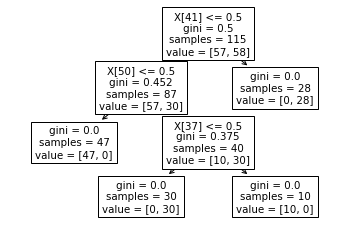

In [87]:
#X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state=2021)
tree_clftrain = DecisionTreeClassifier(max_depth=5, max_features=5, min_samples_leaf=2)
tree_clftrain.fit(X_train, Y_train)
plot_tree(tree_clftrain);

tree_predit_train = tree_clftrain.predict(X_test)
tree_accuracy = accuracy_score(Y_test, tree_predit_train)
tree_f1 = f1_score(Y_test, tree_predit_train)
tree_precision = precision_score(Y_test, tree_predit_train)
tree_recall = recall_score(Y_test, tree_predit_train)
tree_cm = confusion_matrix(Y_test, tree_predit_train)

print("Accuracy:", tree_accuracy)
print("F1 Score: ", tree_f1)
print("Precision Score: ", tree_precision)
print("Recall Score: ", tree_recall)

Accuracy: 0.8409090909090909
F1 Score:  0.8205128205128205
Precision Score:  1.0
Recall Score:  0.6956521739130435


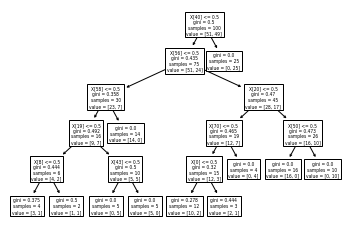

In [88]:
tree_clf30 = DecisionTreeClassifier(max_depth=5, max_features=5, min_samples_leaf=2)
tree_clf30.fit(X3_train, Y3_train)

plot_tree(tree_clf30);

tree_predit30 = tree_clf30.predict(X3_test)
tree_accuracy = accuracy_score(Y3_test, tree_predit30)
tree_f1 = f1_score(Y3_test, tree_predit30)
tree_precision = precision_score(Y3_test, tree_predit30)
tree_recall = recall_score(Y3_test, tree_predit30)
tree_cm = confusion_matrix(Y3_test, tree_predit30)

print("Accuracy:", tree_accuracy)
print("F1 Score: ", tree_f1)
print("Precision Score: ", tree_precision)
print("Recall Score: ", tree_recall)

Accuracy: 1.0
F1 Score:  1.0
Precision Score:  1.0
Recall Score:  1.0


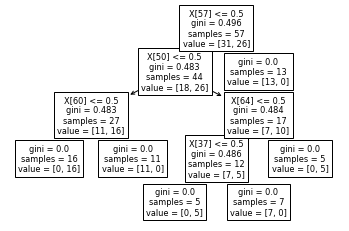

In [89]:
tree_clf60 = DecisionTreeClassifier(max_depth=5, max_features=5, min_samples_leaf=2)
tree_clf60.fit(X6_train, Y6_train)
plot_tree(tree_clf60);

tree_predit60 = tree_clf60.predict(X6_test)
tree_accuracy = accuracy_score(Y6_test, tree_predit60)
tree_f1 = f1_score(Y6_test, tree_predit60)
tree_precision = precision_score(Y6_test, tree_predit60)
tree_recall = recall_score(Y6_test, tree_predit60)
tree_cm = confusion_matrix(Y6_test, tree_predit60)

print("Accuracy:", tree_accuracy)
print("F1 Score: ", tree_f1)
print("Precision Score: ", tree_precision)
print("Recall Score: ", tree_recall)

In [90]:
#'criterion': 'gini', 
#'max_depth': 5, 
#'max_features': 5, 
#'min_samples_leaf': 2, 
#'min_samples_split': 2, 
#'min_weight_fraction_leaf': 0.
#(max_depth=5, max_features=5, min_samples_leaf=2)
tree_clftrain = DecisionTreeClassifier(max_depth=5, max_features=5, min_samples_leaf=2,min_samples_split=2,min_weight_fraction_leaf=0,criterion='gini')

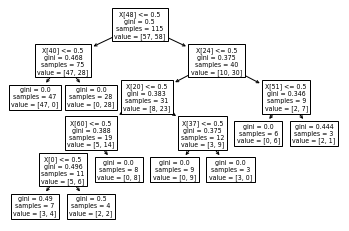

In [91]:
tree_clftrain.fit(X_train, Y_train)
plot_tree(tree_clftrain);

Accuracy: 1.0
F1 Score:  1.0
Precision Score:  1.0
Recall Score:  1.0


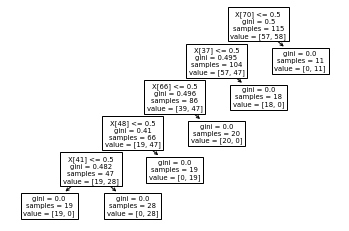

In [92]:
tree_clftrainbest = DecisionTreeClassifier(max_depth=5, max_features=5, min_samples_leaf=2,min_samples_split=2,min_weight_fraction_leaf=0,criterion='gini')
tree_clftrainbest.fit(X_train, Y_train)
plot_tree(tree_clftrainbest);

tree_predit_train_best = tree_clftrainbest.predict(X_test)
tree_accuracy = accuracy_score(Y_test, tree_predit_train_best)
tree_f1 = f1_score(Y_test, tree_predit_train_best)
tree_precision = precision_score(Y_test, tree_predit_train_best)
tree_recall = recall_score(Y_test, tree_predit_train_best)
tree_cm = confusion_matrix(Y_test, tree_predit_train_best)

print("Accuracy:", tree_accuracy)
print("F1 Score: ", tree_f1)
print("Precision Score: ", tree_precision)
print("Recall Score: ", tree_recall)



Accuracy: 1.0
F1 Score:  1.0
Precision Score:  1.0
Recall Score:  1.0


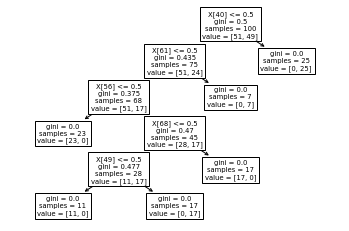

In [93]:

tree_clf30 = DecisionTreeClassifier(max_depth=5, max_features=5, min_samples_leaf=2,min_samples_split=2,min_weight_fraction_leaf=0,criterion='gini')
#tree_clf30 = DecisionTreeClassifier(max_depth=5, max_features=5, min_samples_leaf=2)
tree_clf30.fit(X3_train, Y3_train)

plot_tree(tree_clf30);

tree_predit30 = tree_clf30.predict(X3_test)
tree_accuracy = accuracy_score(Y3_test, tree_predit30)
tree_f1 = f1_score(Y3_test, tree_predit30)
tree_precision = precision_score(Y3_test, tree_predit30)
tree_recall = recall_score(Y3_test, tree_predit30)
tree_cm = confusion_matrix(Y3_test, tree_predit30)

print("Accuracy:", tree_accuracy)
print("F1 Score: ", tree_f1)
print("Precision Score: ", tree_precision)
print("Recall Score: ", tree_recall)

Accuracy: 0.9195402298850575
F1 Score:  0.9176470588235294
Precision Score:  1.0
Recall Score:  0.8478260869565217


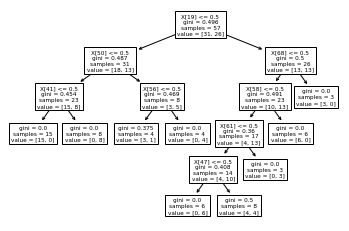

In [94]:
tree_clf60 = DecisionTreeClassifier(max_depth=5, max_features=5, min_samples_leaf=2,min_samples_split=2,min_weight_fraction_leaf=0,criterion='gini')
#tree_clf60 = DecisionTreeClassifier(max_depth=5, max_features=5, min_samples_leaf=2)
tree_clf60.fit(X6_train, Y6_train)
plot_tree(tree_clf60);

tree_predit60 = tree_clf60.predict(X6_test)
tree_accuracy = accuracy_score(Y6_test, tree_predit60)
tree_f1 = f1_score(Y6_test, tree_predit60)
tree_precision = precision_score(Y6_test, tree_predit60)
tree_recall = recall_score(Y6_test, tree_predit60)
tree_cm = confusion_matrix(Y6_test, tree_predit60)

print("Accuracy:", tree_accuracy)
print("F1 Score: ", tree_f1)
print("Precision Score: ", tree_precision)
print("Recall Score: ", tree_recall)

In [95]:
plot_search_results(search)

NameError: name 'plot_search_results' is not defined

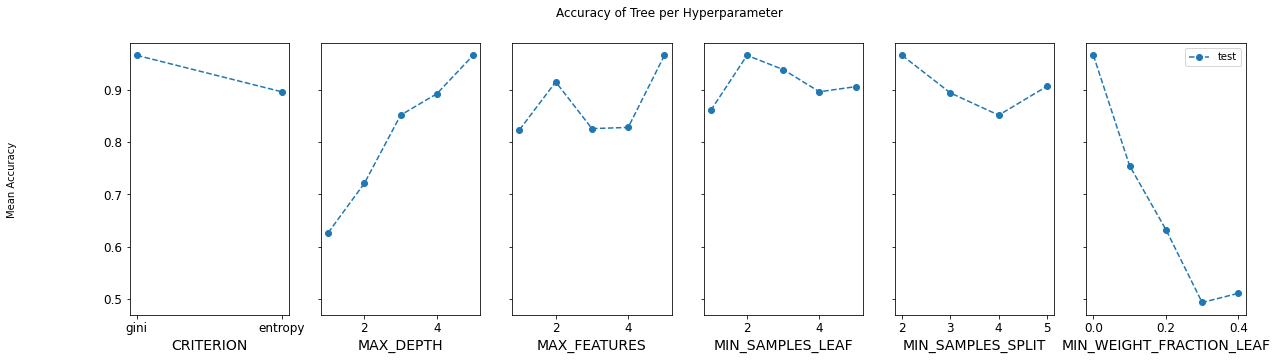

In [96]:
def plot_search_results(gridseachcv):
    ## Results from grid search
    results = gridseachcv.cv_results_
    means_test = results['mean_test_accuracy']

    masks=[]
    masks_names= list(gridseachcv.best_params_.keys())
    for p_k, p_v in gridseachcv.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))
    params=gridseachcv.param_grid
    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Accuracy of Tree per Hyperparameter')
    fig.text(0.04, 0.5, 'Mean Accuracy', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        # e_1 = np.array(stds_test[best_index])
        # ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_1, linestyle='--', marker='o', label='test')
        ax[i].set_xlabel(p.upper())
    plt.legend()
    plt.show()

    
plot_search_results(search)

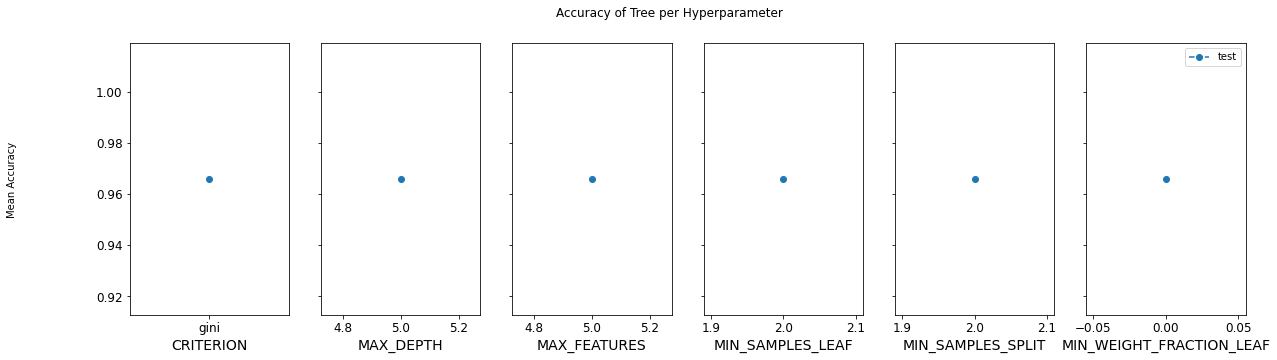

In [97]:
plot_search_results(search1)

Linear Regression - Lab 9

In [98]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

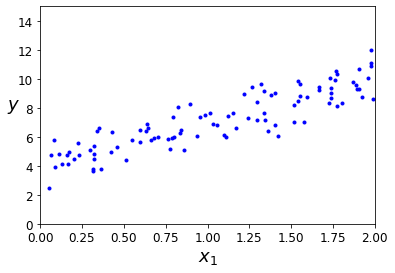

In [99]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [100]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [101]:
theta_best

array([[4.00499998],
       [3.00427915]])

In [102]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.00499998],
       [10.01355828]])

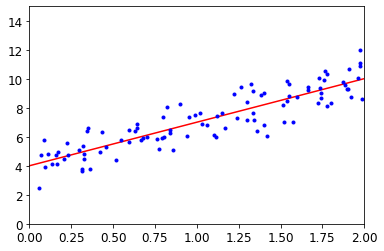

In [103]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [104]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.00499998]), array([[3.00427915]]))

In [105]:
X = np.load('smiley_X.npy')
X = X.reshape(144,81)
y = np.load('smiley_y.npy')

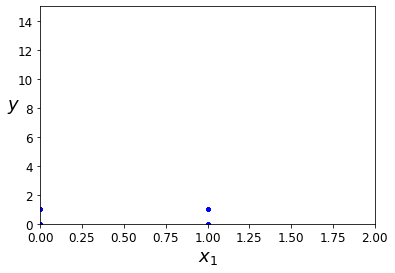

In [106]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [107]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [108]:
y

array([0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1.])

In [109]:
X[143]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [110]:
X[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

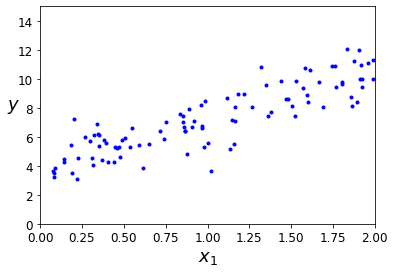

In [111]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [112]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.82582245]), array([[3.35592745]]))

In [113]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

In [114]:
lin_reg.predict(X_new)

array([[ 3.82582245],
       [10.53767734]])

In [115]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[7.01256799],
       [0.16375461]])

Linear regression using batch gradient descent

In [116]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100      #batch size is 100 samples      

theta = np.random.randn(2,1)  # random initialization of the weights
#
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)# This is the gradient descent iteration  - m is for the batch version
    theta = theta - eta * gradients                # theta are the weights and updated acording to the gradient descent

In [117]:
theta

array([[7.01256799],
       [0.16375461]])

The effect of learning rate for gradient descent in linear regression.
Plotting the first 10 iterations in graphs below for learning rate =.02, 0.1 and 0.5

In [118]:
theta_path_bgd = []
def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

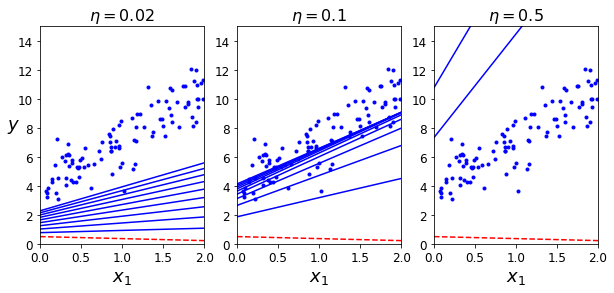

In [119]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

Logistic Regression

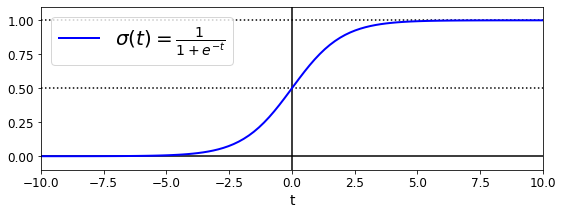

In [120]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()